# Bangalore House Price Prediction - Outlier Detection

This notebook only train ML model on different ml algorithms

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

: 

In [19]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [20]:
"""from google.colab import files
files=files.upload()
df = pd.read_csv('oh_encoded_data.csv')"""

"from google.colab import files\nfiles=files.upload()\ndf = pd.read_csv('oh_encoded_data.csv')"

In [21]:
# Get clean data

# This file contain [area_type	availability	location	bath	balcony	price	total_sqft_int	bhk	price_per_sqft]
# and ['area_type','availability','location'] this are cat var
# We encoded few classes from above car var in OHE 

df = pd.read_csv('ohe_data_reduce_cat_class.csv')
df.shape

(7120, 108)

In [22]:
df.shape

(7120, 108)

In [23]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Chandapura,location_Koramangala,location_Kaggadasapura,location_Kundalahalli,location_Ramagondanahalli,location_Budigere,location_Hulimavu,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_Yeshwanthpur,location_Gottigere,location_8th Phase JP Nagar,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Old Airport Road,location_Sahakara Nagar,location_Brookefield,location_Kengeri,location_Hosa Road,location_Vijayanagar,location_Balagere,location_Green Glen Layout,location_Bommasandra,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Mysore Road,location_Thigalarapalya,location_Talaghattapura,location_Kadugodi,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Frazer Town,location_Kanakapura,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_Lakshminarayana Pura,location_Nagarbhavi,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Doddathoguru,location_Bhoganhalli,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Chandapura,location_Koramangala,location_Kaggadasapura,location_Kundalahalli,location_Ramagondanahalli,location_Budigere,location_Hulimavu,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_Yeshwanthpur,location_Gottigere,location_8th Phase JP Nagar,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Old Airport Road,location_Sahakara Nagar,location_Brookefield,location_Kengeri,location_Hosa Road,location_Vijayanagar,location_Balagere,location_Green Glen Layout,location_Bommasandra,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Mysore Road,location_Thigalarapalya,location_Talaghattapura,location_Kadugodi,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Frazer Town,location_Kanakapura,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_Lakshminarayana Pura,location_Nagarbhavi,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Doddathoguru,location_Bhoganhalli,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df.shape

(7120, 108)

## Split Dataset in train and test

In [26]:
X = df.drop("price", axis=1)
y = df['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (7120, 107)
Shape of y =  (7120,)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5696, 107)
Shape of y_train =  (5696,)
Shape of X_test =  (1424, 107)
Shape of y_test =  (1424,)


## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

## Machine Learning Model Training

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [30]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [31]:
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.7842744111909903
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.7903837092682255, 64.898435311056)

In [32]:
# Lasso 
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8036372973672522, 62.813242204691534)

####  ridge regression

In [33]:
lr_ridge.fit(X_train, y_train)

# Calculate R-squared and RMSE for Ridge regression
lr_ridge_score = lr_ridge.score(X_test, y_test)
lr_ridge_rmse = rmse(y_test, lr_ridge.predict(X_test))

# Output results
lr_ridge_score, lr_ridge_rmse

(0.7905686374336629, 64.869801571005)

## Support Vector Machine

In [34]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) # with 0.2630802200711362
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.2063803584082815, 126.27806378079056)

## Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) # with 0.8863376025408044
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.8978308103853656, 45.30870867154417)

## XGBoost

In [36]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) # with 0.8838865742273464
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score, xgb_reg_rmse

(0.8811268741365585, 48.87238707845022)

## Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()

# Train the model
gb_reg.fit(X_train, y_train)

# Evaluate the model
gb_reg_score = gb_reg.score(X_test, y_test)
gb_reg_rmse = mean_squared_error(y_test, gb_reg.predict(X_test), squared=False)

print("Gradient Boosting Regressor Score:", gb_reg_score)
print("Gradient Boosting Regressor RMSE:", gb_reg_rmse)


Gradient Boosting Regressor Score: 0.891080270966908
Gradient Boosting Regressor RMSE: 46.781590868134224


In [38]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))

                    Model     Score        RMSE
0       Linear Regression  0.790384   64.898435
1                   Lasso  0.803637   62.813242
2  Support Vector Machine  0.206380  126.278064
3           Random Forest  0.897831   45.308709
4                 XGBoost  0.881127   48.872387


## Cross Validation

In [50]:
from sklearn.model_selection import KFold,cross_val_score
cvs = cross_val_score(xgb_reg, X_train,y_train, cv = 10)
cvs, cvs.mean() # 0.9845963377450353)'''

(array([0.99215108, 0.96912061, 0.99505317, 0.96791025, 0.96841357,
        0.98628591, 0.98932835, 0.88337835, 0.98860677, 0.90048394]),
 0.9640732001671554)

In [40]:
'''cvs_rfr = cross_val_score(rfr, X_train,y_train, cv = 10)
cvs_rfr, cvs_rfr.mean() # 0.9652425691235843)'''

'cvs_rfr = cross_val_score(rfr, X_train,y_train, cv = 10)\ncvs_rfr, cvs_rfr.mean() # 0.9652425691235843)'

In [41]:
'''from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(RandomForestRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean() # 0.9652425691235843)'''

'from sklearn.model_selection import cross_val_score\ncvs_rfr2 = cross_val_score(RandomForestRegressor(), X_train,y_train, cv = 10)\ncvs_rfr2, cvs_rfr2.mean() # 0.9652425691235843)'

# Hyper Parmeter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
'''
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM
              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.
              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,
              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.
              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.
              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.
              'objective':['reg:linear'], #This defines the loss function to be minimized.

              'n_estimators': [100,300,500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_) # 0.9397345161940295
print(xgb_grid.best_params_)'''

"\n# Various hyper-parameters to tune\nxgb1 = XGBRegressor()\nparameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM\n              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.\n              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,\n              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.\n              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.\n              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.\n              'objective':['reg:linear'], #This defines the loss function to be minimized.\n\n              'n_estimators': [100,300,500]}\n\nxgb_grid = GridSearchCV(xgb1,\n                        parameters,\n                        cv = 2,\n   

In [43]:
'''xgb_tune = xgb_grid.estimator

xgb_tune.fit(X_train,y_train) # 0.9117591385438816
xgb_tune.score(X_test,y_test)'''

'xgb_tune = xgb_grid.estimator\n\nxgb_tune.fit(X_train,y_train) # 0.9117591385438816\nxgb_tune.score(X_test,y_test)'

In [44]:
'''cvs = cross_val_score(xgb_tune, X_train,y_train, cv = 10)
cvs, cvs.mean() #  0.9645582338461773)'''

'cvs = cross_val_score(xgb_tune, X_train,y_train, cv = 10)\ncvs, cvs.mean() #  0.9645582338461773)'

In [45]:
#[i/10.0 for i in range(1,6)]

In [46]:
#xgb_grid.estimator


In [47]:
missing_value = -999
xgb_tune2 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.6, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=missing_value, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tune2.fit(X_train,y_train) # 0.9412851220926807
xgb_tune2.score(X_test,y_test)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.8644633914228479

In [48]:
'''parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM
              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.
              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,
              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.
              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.
              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.
              'objective':['reg:linear'], #This defines the loss function to be minimized.
              'n_estimators': [100,300,500]}'''

xgb_tune2 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.9, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=missing_value, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tune2.fit(X_train,y_train) # 0.9412851220926807
xgb_tune2.score(X_test,y_test)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:14:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.8289115318375981

In [51]:
cvs = cross_val_score(xgb_tune2, X_train,y_train, cv = 5)
cvs, cvs.mean() #  0.9706000326331659'''

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:17:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:17:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:17:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  w

(array([0.9852852 , 0.97405125, 0.9836937 , 0.92122958, 0.91083   ]),
 0.9550179475756362)

In [52]:
np.sqrt(mean_squared_error(y_test, xgb_tune2.predict(X_test)))

58.6316450178789

## Test Model

In [53]:
list(X.columns)

['bath',
 'balcony',
 'total_sqft_int',
 'bhk',
 'price_per_sqft',
 'area_typeSuper built-up  Area',
 'area_typeBuilt-up  Area',
 'area_typePlot  Area',
 'availability_Ready To Move',
 'location_Whitefield',
 'location_Sarjapur  Road',
 'location_Electronic City',
 'location_Marathahalli',
 'location_Raja Rajeshwari Nagar',
 'location_Haralur Road',
 'location_Hennur Road',
 'location_Bannerghatta Road',
 'location_Uttarahalli',
 'location_Thanisandra',
 'location_Electronic City Phase II',
 'location_Hebbal',
 'location_Yelahanka',
 'location_7th Phase JP Nagar',
 'location_Kanakpura Road',
 'location_KR Puram',
 'location_Sarjapur',
 'location_Rajaji Nagar',
 'location_Bellandur',
 'location_Kasavanhalli',
 'location_Begur Road',
 'location_Banashankari',
 'location_Kothanur',
 'location_Hormavu',
 'location_Harlur',
 'location_Akshaya Nagar',
 'location_Electronics City Phase 1',
 'location_Jakkur',
 'location_Varthur',
 'location_HSR Layout',
 'location_Hennur',
 'location_Ramamurt

In [54]:
# it help to get predicted value of hosue  by providing features value 
def predict_house_price(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):

  x =np.zeros(len(X.columns)) # create zero numpy array, len = 107 as input value for model

  # adding feature's value accorind to their column index
  x[0]=bath
  x[1]=balcony
  x[2]=total_sqft_int
  x[3]=bhk
  x[4]=price_per_sqft

  if "availability"=="Ready To Move":
    x[8]=1

  if 'area_type'+area_type in X.columns:
    area_type_index = np.where(X.columns=="area_type"+area_type)[0][0]
    x[area_type_index] =1

    #print(area_type_index)

  if 'location_'+location in X.columns:
    loc_index = np.where(X.columns=="location_"+location)[0][0]
    x[loc_index] =1

    #print(loc_index)

  #print(x)

  # feature scaling
  x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
  #print(x)

  return model.predict([x])[0] # return the predicted value by train XGBoost model

In [ ]:
predict_house_price(model=xgb_tune2, bath=3,balcony=2,total_sqft_int=1672,bhk=3,price_per_sqft=8971.291866,area_type="Plot  Area",availability="Ready To Move",location="Devarabeesana Halli")

In [55]:
##test sample
#area_type	availability	location	bath	balcony	price	total_sqft_int	bhk	price_per_sqft
#2	Super built-up Area	Ready To Move	Devarabeesana Halli	3.0	2.0	150.0	1750.0	3	8571.428571

predict_house_price(model=xgb_tune2, bath=3,balcony=2,total_sqft_int=1750,bhk=3,price_per_sqft=8571.428571,area_type="Super built-up",availability="Ready To Move",location="Devarabeesana Halli")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


146.5464

In [56]:
##test sample
#area_type	availability	location	bath	balcony	price	total_sqft_int	bhk	price_per_sqft
#1	Built-up Area	Ready To Move	Devarabeesana Halli	3.0	3.0	149.0	1750.0	3	8514.285714
predict_house_price(model=xgb_tune2,bath=3,balcony=3,total_sqft_int=1750,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


146.5464

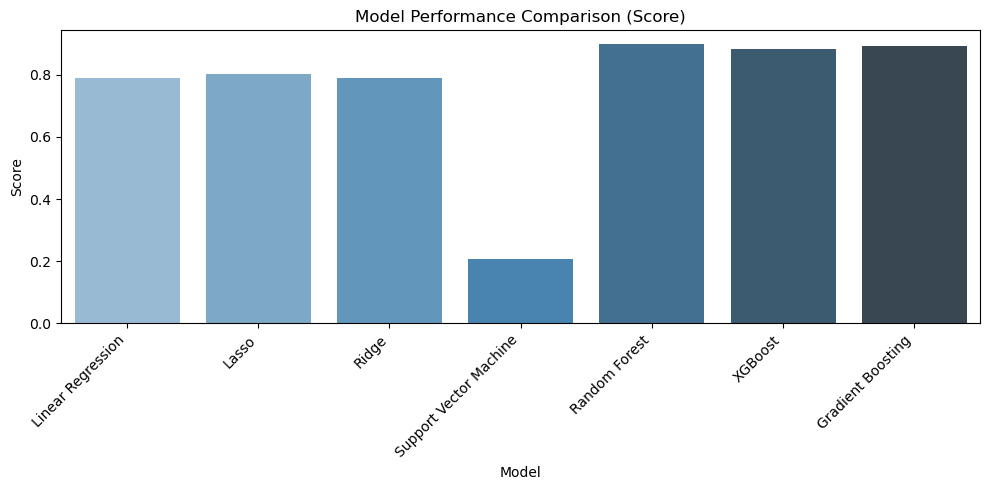

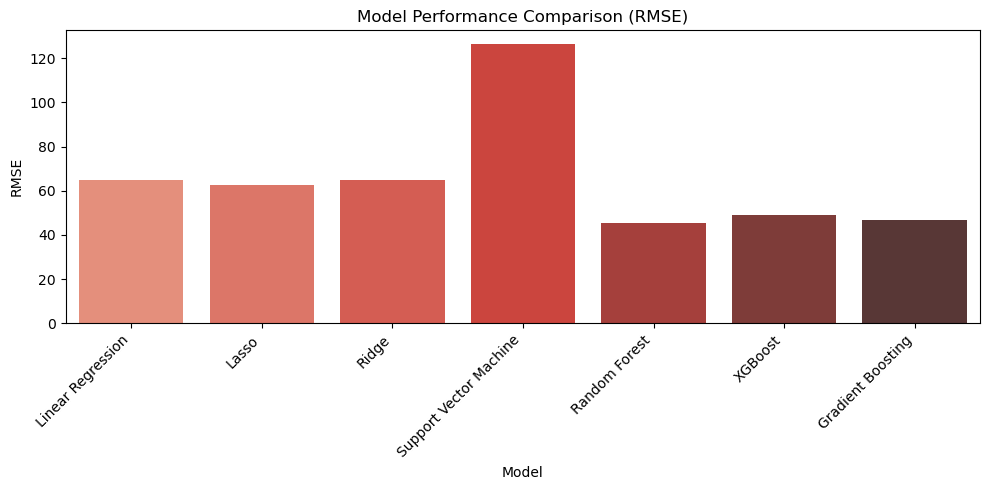

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
data = [{'Model': 'Linear Regression', 'Score': lr_score, 'RMSE': lr_rmse},
        {'Model': 'Lasso', 'Score': lr_lasso_score, 'RMSE': lr_lasso_rmse},
        {'Model': 'Ridge', 'Score': lr_ridge_score, 'RMSE': lr_ridge_rmse},  # Include Ridge
        {'Model': 'Support Vector Machine', 'Score': svr_score, 'RMSE': svr_rmse},
        {'Model': 'Random Forest', 'Score': rfr_score, 'RMSE': rfr_rmse},
        {'Model': 'XGBoost', 'Score': xgb_reg_score, 'RMSE': xgb_reg_rmse},
        {'Model': 'Gradient Boosting', 'Score': gb_reg_score, 'RMSE': gb_reg_rmse}]

df = pd.DataFrame(data)

# Set up the matplotlib figure for Score
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Score', data=df, palette='Blues_d')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Score)')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

# Set up the matplotlib figure for RMSE
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='RMSE', data=df, palette='Reds_d')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (RMSE)')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()
